# $A^n \textbf{x}$

Soit A une matrice qui représente une application linéraire quelconque. Que se passe-t-il si on l'applique $n$ fois ?

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.set_printoptions(precision=3, linewidth=150, suppress=True)
plt.style.use(['seaborn-whitegrid','data/cours.mplstyle'])

/tmp/ipykernel_1943622/2527379479.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid','data/cours.mplstyle'])


In [2]:
def arrow2D(a,b, color='k', **kargs):
    astyle = matplotlib.patches.ArrowStyle("simple", head_length=.8, head_width=.8, tail_width=.1)
    plt.plot([a[0],b[0]], [a[1],b[1]] ,visible = False) # to define the visible windows
    plt.annotate("", xytext=a, xy=b, 
                 arrowprops=dict(arrowstyle=astyle, shrinkA=0, shrinkB=0, aa=True, color=color, **kargs))

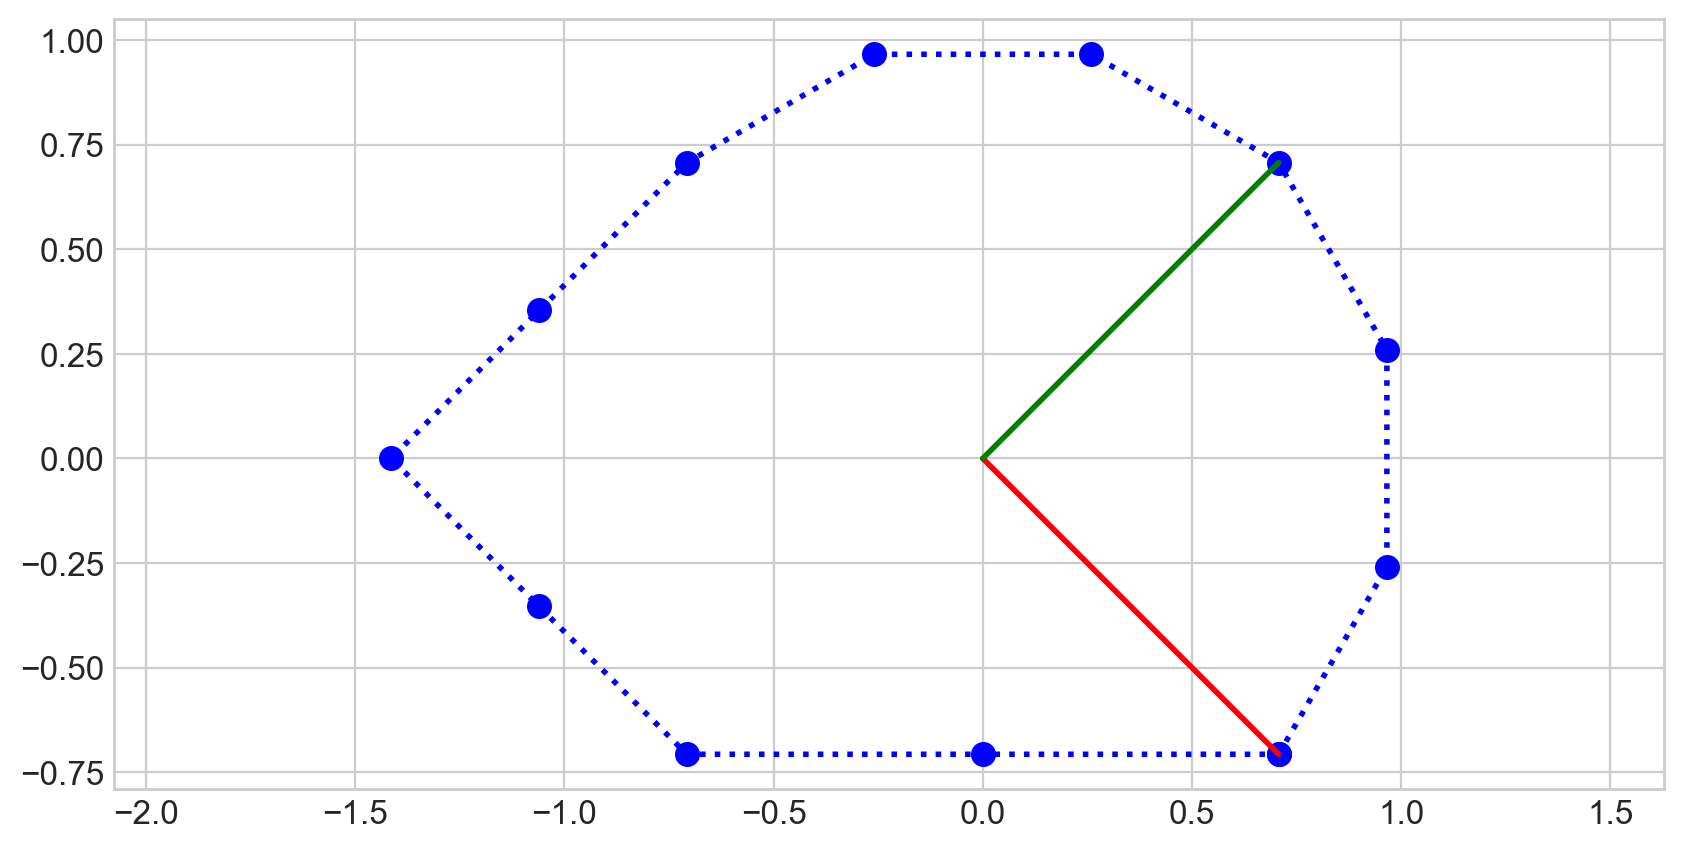

In [3]:
mouse = np.load('data/mouse.npy')

plt.plot(mouse[0], mouse[1], ':ob')
plt.plot([0,mouse[0][0]], [0,mouse[1][0]], 'r')  # le point 0
plt.plot([0,mouse[0][3]], [0,mouse[1][3]], 'g')  # le point 3 pour voir comment ils évoluent
plt.axis("equal");

In [4]:
mouse

array([[ 0.707,  0.966,  0.966,  0.707,  0.259, -0.259, -0.707, -1.061, -1.414, -1.061, -0.707, -0.   ,  0.707],
       [-0.707, -0.259,  0.259,  0.707,  0.966,  0.966,  0.707,  0.354,  0.   , -0.354, -0.707, -0.707, -0.707]])

In [5]:
# on prend une matrice de transformation au hasard (donc probablement pas orthoganale)
A = np.array([[3,1], [0,2]])
A

array([[3, 1],
       [0, 2]])

In [6]:
as1 = np.dot(A, mouse)   # autre facon d'écrire le produit matrice vecteur
as1

array([[ 1.414,  2.639,  3.157,  2.828,  1.742,  0.189, -1.414, -2.828, -4.243, -3.536, -2.828, -0.707,  1.414],
       [-1.414, -0.518,  0.518,  1.414,  1.932,  1.932,  1.414,  0.707,  0.   , -0.707, -1.414, -1.414, -1.414]])

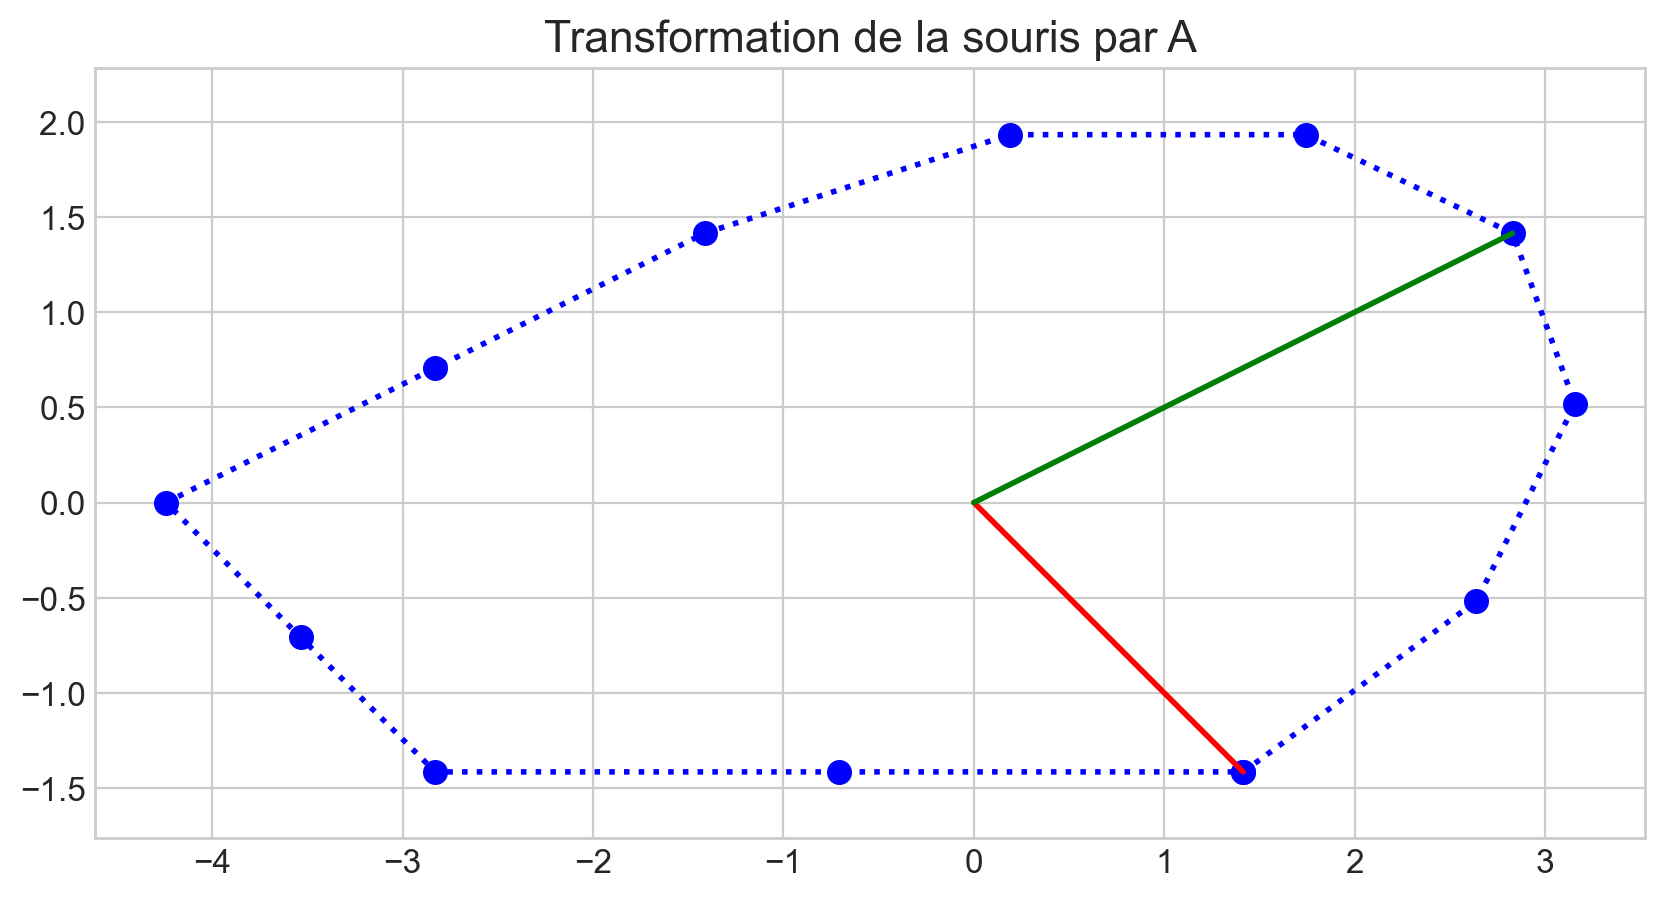

In [7]:
plt.plot(as1[0], as1[1], ':ob')
plt.plot([0,as1[0][0]], [0,as1[1][0]], 'r')
plt.plot([0,as1[0][3]], [0,as1[1][3]], 'g')
plt.title("Transformation de la souris par A")
plt.axis('equal');

On constate que la transformation n'est pas une isométrie donc que la matrice n'est pas orthogonale.

Appliquons plusieurs fois de suite la transformation pour voir.

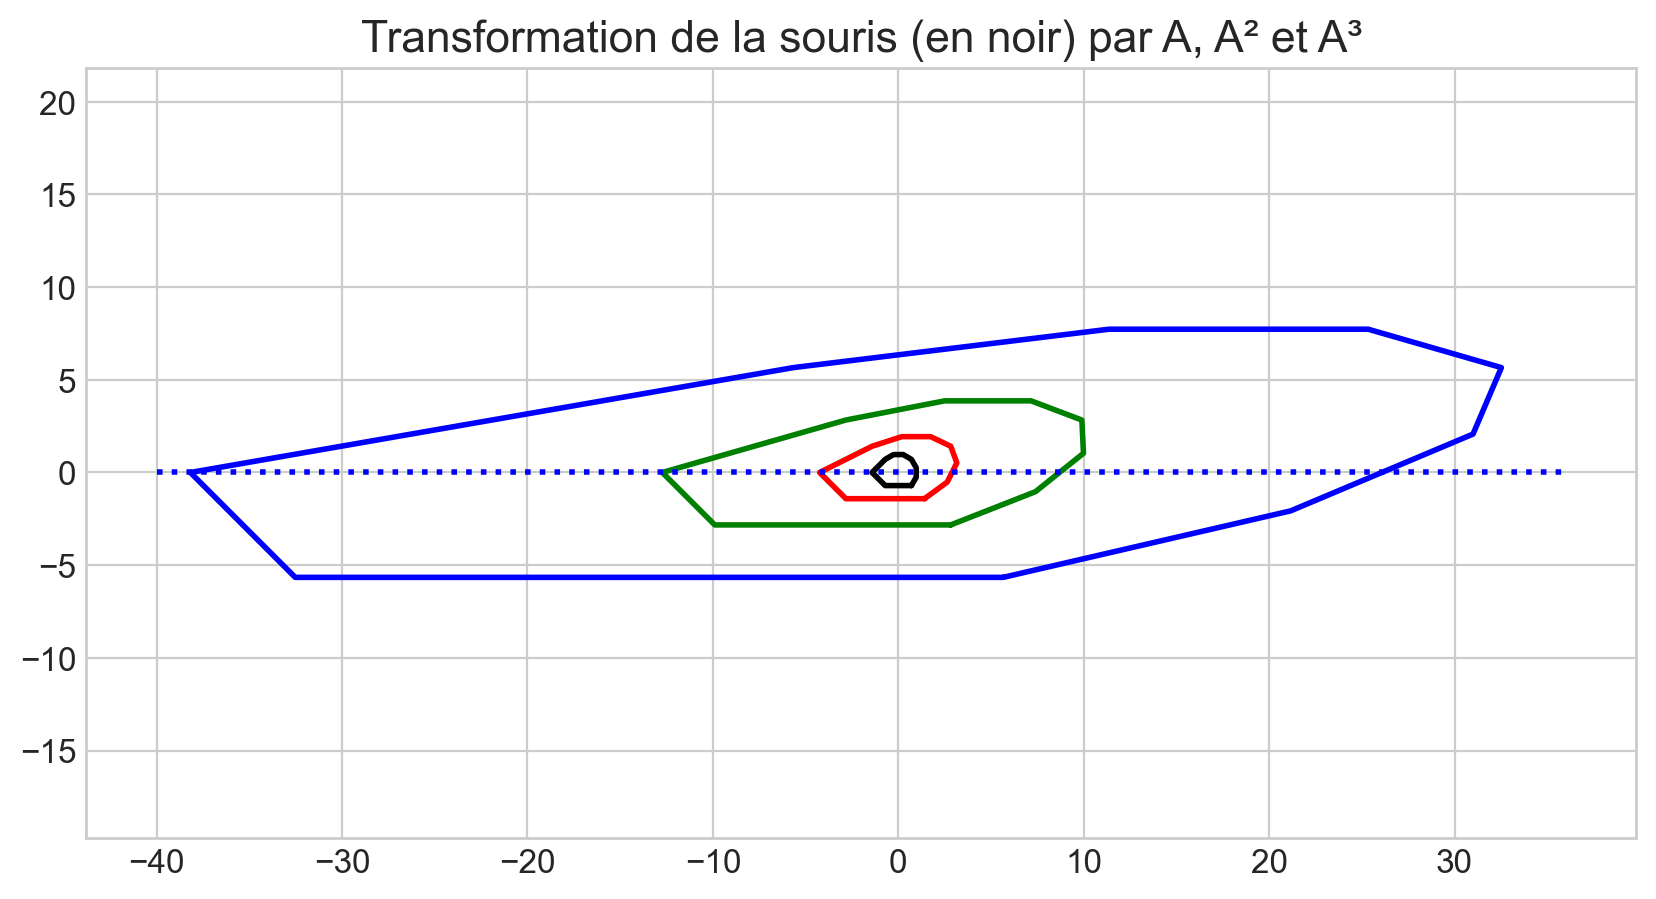

In [8]:
aas1 = A @ A @ mouse
aaas1 = A @ A @ A @ mouse

plt.plot(mouse[0], mouse[1], 'k')
plt.plot(as1[0], as1[1], 'r')
plt.plot(aas1[0], aas1[1], 'g')
plt.plot(aaas1[0], aaas1[1], 'b')
plt.plot([-40,36], [0,0], ':b')
plt.title("Transformation de la souris (en noir) par A, A² et A³")
plt.axis('equal');

On note 

* que la souris est de plus en plus grosse (donc le det(A)  > 1)
* que sa pointe (son point le plus à gauche) reste toujours sur l'axe horizontal
* qu'elle est de plus en plus écrasée

Évolution du point 0 transformé par A et A³
[ 1.414 -1.414]  et normé  [ 0.707 -0.707]
[ 5.657 -5.657]  et normé  [ 0.707 -0.707]

Évolution du point 3 transformé par A et A³
[2.828 1.414]  et normé  [0.894 0.447]
[32.527  5.657]  et normé  [0.985 0.171]


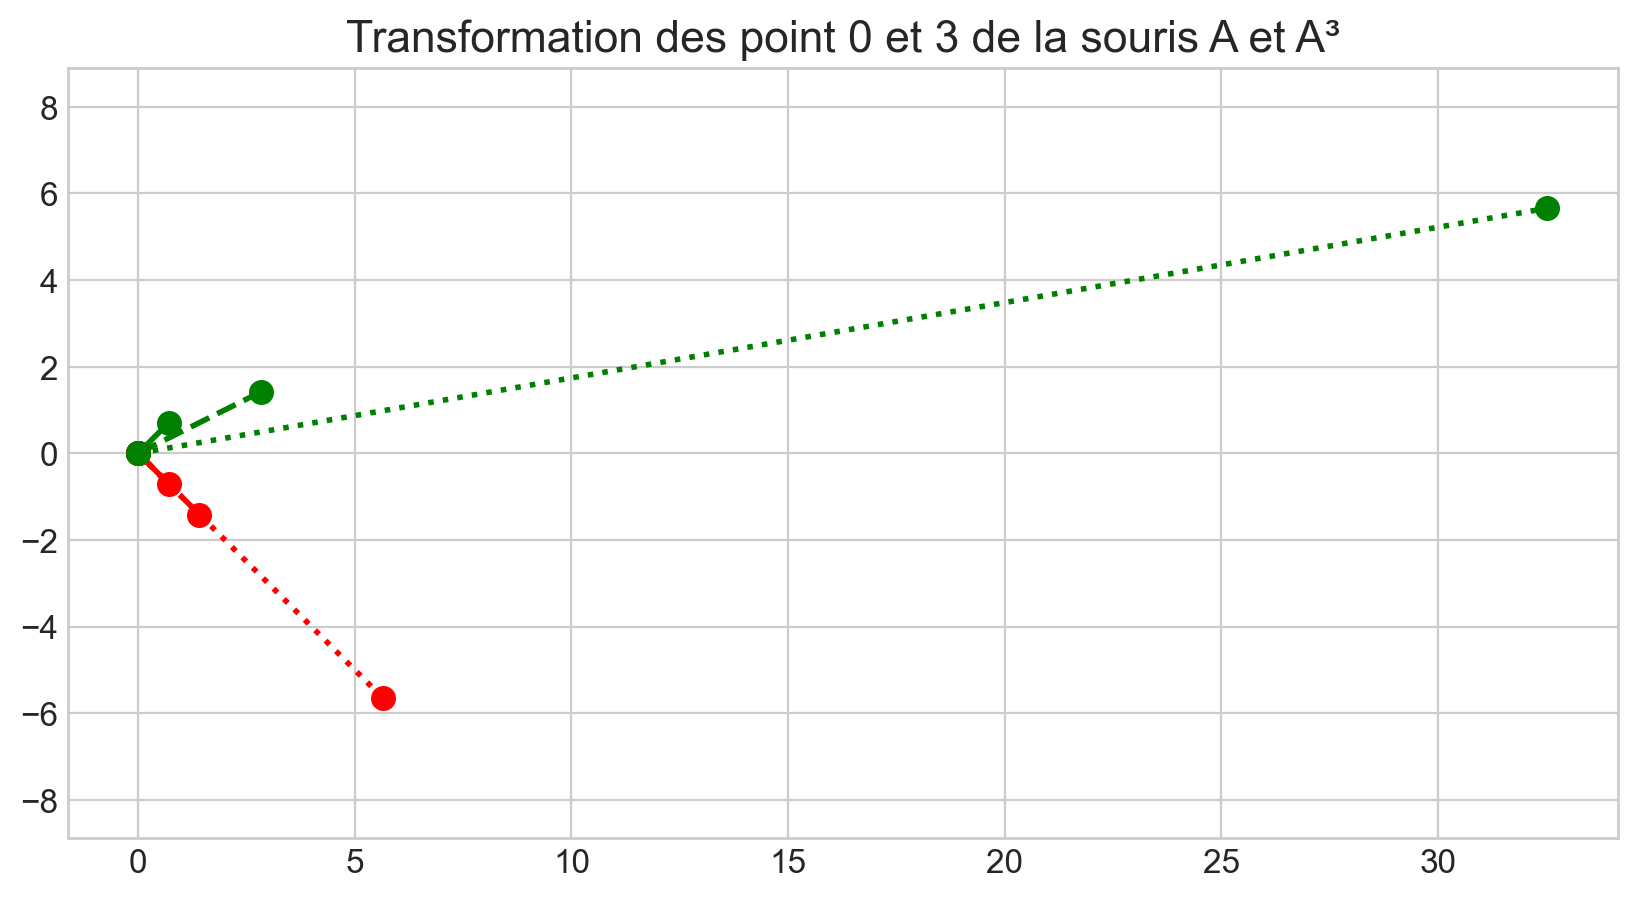

In [9]:
print('Évolution du point 0 transformé par A et A³')
print(as1[:,0], " et normé ", as1[:,0] / lin.norm(as1[:,0]))
print(aaas1[:,0], " et normé ", aaas1[:,0] / lin.norm(aaas1[:,0]))
print('\nÉvolution du point 3 transformé par A et A³')
print(as1[:,3], " et normé ", as1[:,3] / lin.norm(as1[:,3]))
print(aaas1[:,3], " et normé ", aaas1[:,3] / lin.norm(aaas1[:,3]))

plt.plot([0,mouse[0][0]], [0,mouse[1][0]], '-or')  # vecteur (0,0) -- point 0 de la souris
plt.plot([0,mouse[0][3]], [0,mouse[1][3]], '-og')  # vecteur (0,0) -- point 3 de la souris
plt.plot([0,as1[0][0]], [0,as1[1][0]], '--or')
plt.plot([0,as1[0][3]], [0,as1[1][3]], '--og')
plt.plot([0,aaas1[0][0]], [0,aaas1[1][0]], ':or')
plt.plot([0,aaas1[0][3]], [0,aaas1[1][3]], ':og')
plt.title("Transformation des point 0 et 3 de la souris A et A³")
plt.axis('equal');

Les transformations du point 0 de la souris par A et A³ sont sur la droite qui passe par (0,0) et le point 0 de la souris (en rouge) !

## Vecteurs propres et valeurs propres

Calculons les valeurs propres et vecteurs propres de A.

Par définition les valeurs propres et vecteurs propres respectent cette propriété :

$$ A \, {\bf v_i} = \lambda_i \, {\bf v_i} $$

pour tout couple de valeur propre / vecteur propre $(\lambda_i, {\bf v_i})$. 

Cela veut dire que si un vecteur ${\bf w}$ est sur la droite générée par ${\bf v_i} $ alors appliquer $A \, {\bf w}$ le laisse sur la même droite. Ci-dessus on a déjà trouvé les vecteurs propres de A (avec pas mal de chance).

In [10]:
val_propre, vec_propre = lin.eig(A)
print("Valeurs propres de A :", val_propre,"\n")
print("Vecteurs propres de A (chaque vecteur propre est écrit verticalement):\n", vec_propre)

Valeurs propres de A : [3. 2.] 

Vecteurs propres de A (chaque vecteur propre est écrit verticalement):
 [[ 1.    -0.707]
 [ 0.     0.707]]


* Le premier vecteur propre (1,0) correspond à la valeur propre 3
* Le second vecteur propre (-0.07, 0.707) correspond à la valeur propre 2

Le point 0 de la souris est sur l'axe du second vecteur propre et on a donc

$$A³ \, s[0] = 2 \times 2 \times 2 \times s[0]$$

In [11]:
print('  A³ s[0] = ', aaas1[:,0], "\n8 s[0] = ", 2*2*2*mouse[:,0])

  A³ s[0] =  [ 5.657 -5.657] 
8 s[0] =  [ 5.657 -5.657]



Les vecteurs propres sont des sortes d'attracteurs qui vont capturer tous les points si on fait un nombre infini
de multiplication par A.

Les 12 points de la souris multipliés par A¹⁰ puis normés :
[[ 0.707  1.     1.     1.     1.     1.    -0.707 -1.    -1.    -1.    -1.    -1.   ]
 [-0.707 -0.006  0.004  0.009  0.014  0.024  0.707  0.009  0.    -0.004 -0.009 -0.018]]


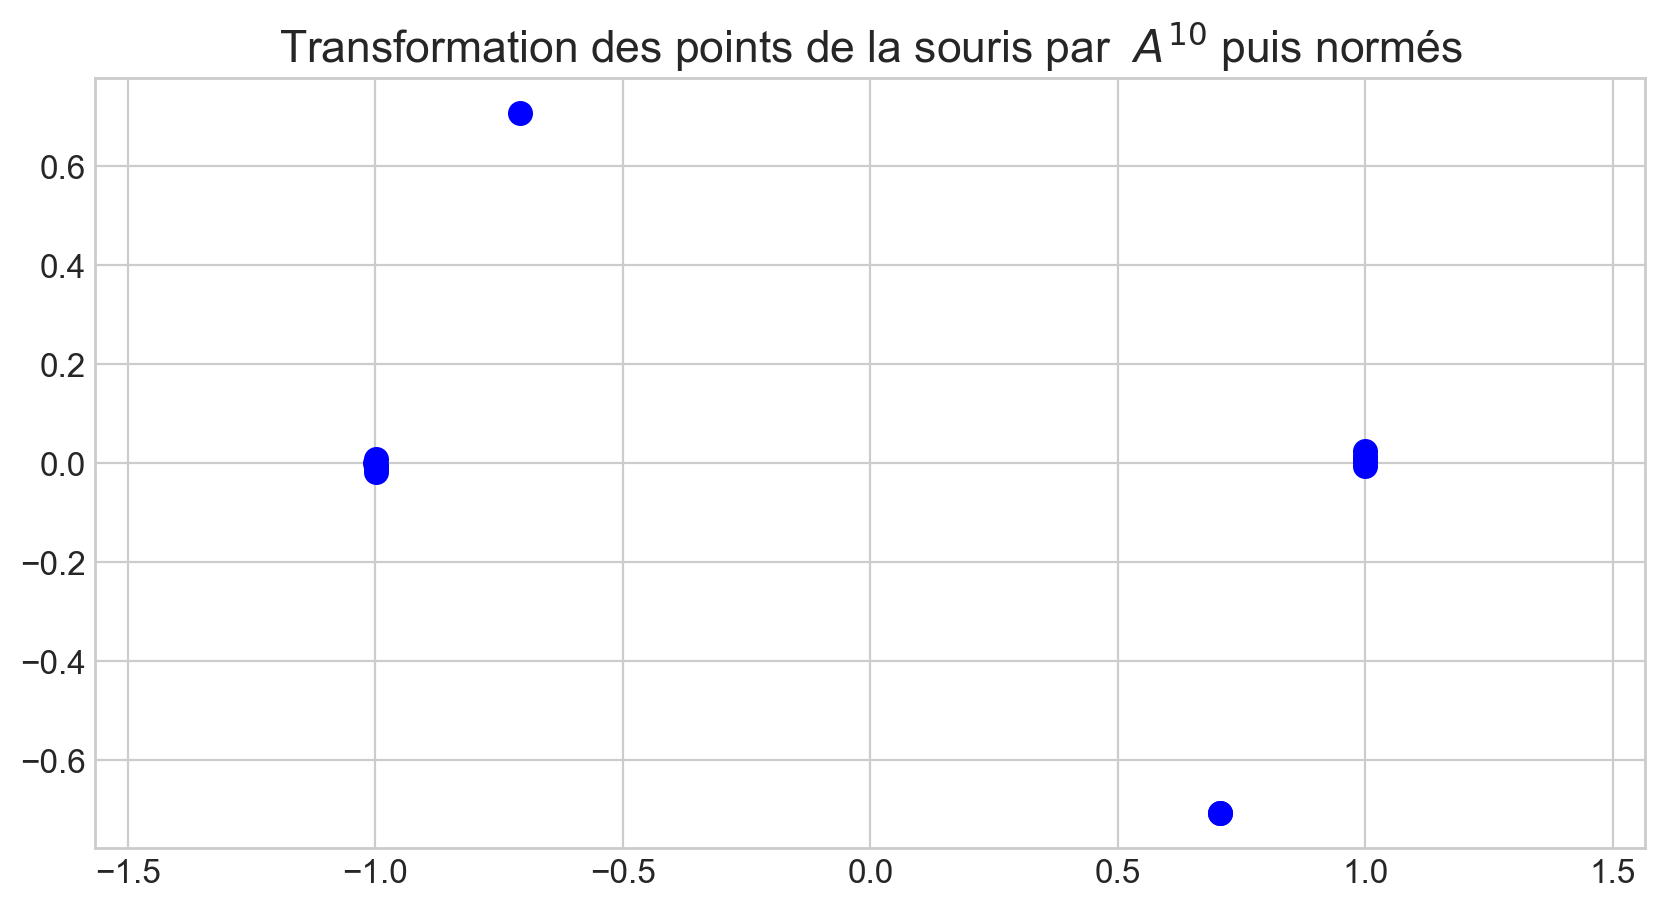

In [12]:
A10 = np.linalg.matrix_power(A,10)
a10s1 = np.array([x/lin.norm(x) for x in (A10 @ mouse).T]).T
print("Les 12 points de la souris multipliés par A¹⁰ puis normés :")
print(a10s1[:,:-1])

plt.plot(a10s1[0], a10s1[1], 'ob')
plt.title(r"Transformation des points de la souris par  $A^{10}$ puis normés")
plt.axis('equal');

Tous les points sont alignés sur le premier vecteur propre sauf ceux qui ont commencé alignés sur le second vecteur propre.

In [13]:
N = 100
cercle = np.array([[np.cos(i * 2*np.pi/N), np.sin(i * 2*np.pi/N)] for i in range(N)]).T
a10c = np.array([x for x in (A10 @ cercle).T]).T
a10cn = np.array([x/lin.norm(x) for x in a10c.T]).T  # a10c normé
nb1 = np.sum([lin.norm(a10cn[:,i] - vec_propre[:,0]) < 0.01 for i in range(N)])   \
      + np.sum([lin.norm(a10cn[:,i] + vec_propre[:,0]) < 0.01 for i in range(N)])
nb2 = np.sum([lin.norm(a10cn[:,i] - vec_propre[:,1]) < 0.01 for i in range(N)])   \
      + np.sum([lin.norm(a10cn[:,i] + vec_propre[:,1]) < 0.01 for i in range(N)])
print("Nombre de points proche du 1er vecteur propre : ", nb1)
print("Nombre de points proche du 2e  vecteur propre : ", nb2)

Nombre de points proche du 1er vecteur propre :  40
Nombre de points proche du 2e  vecteur propre :  0


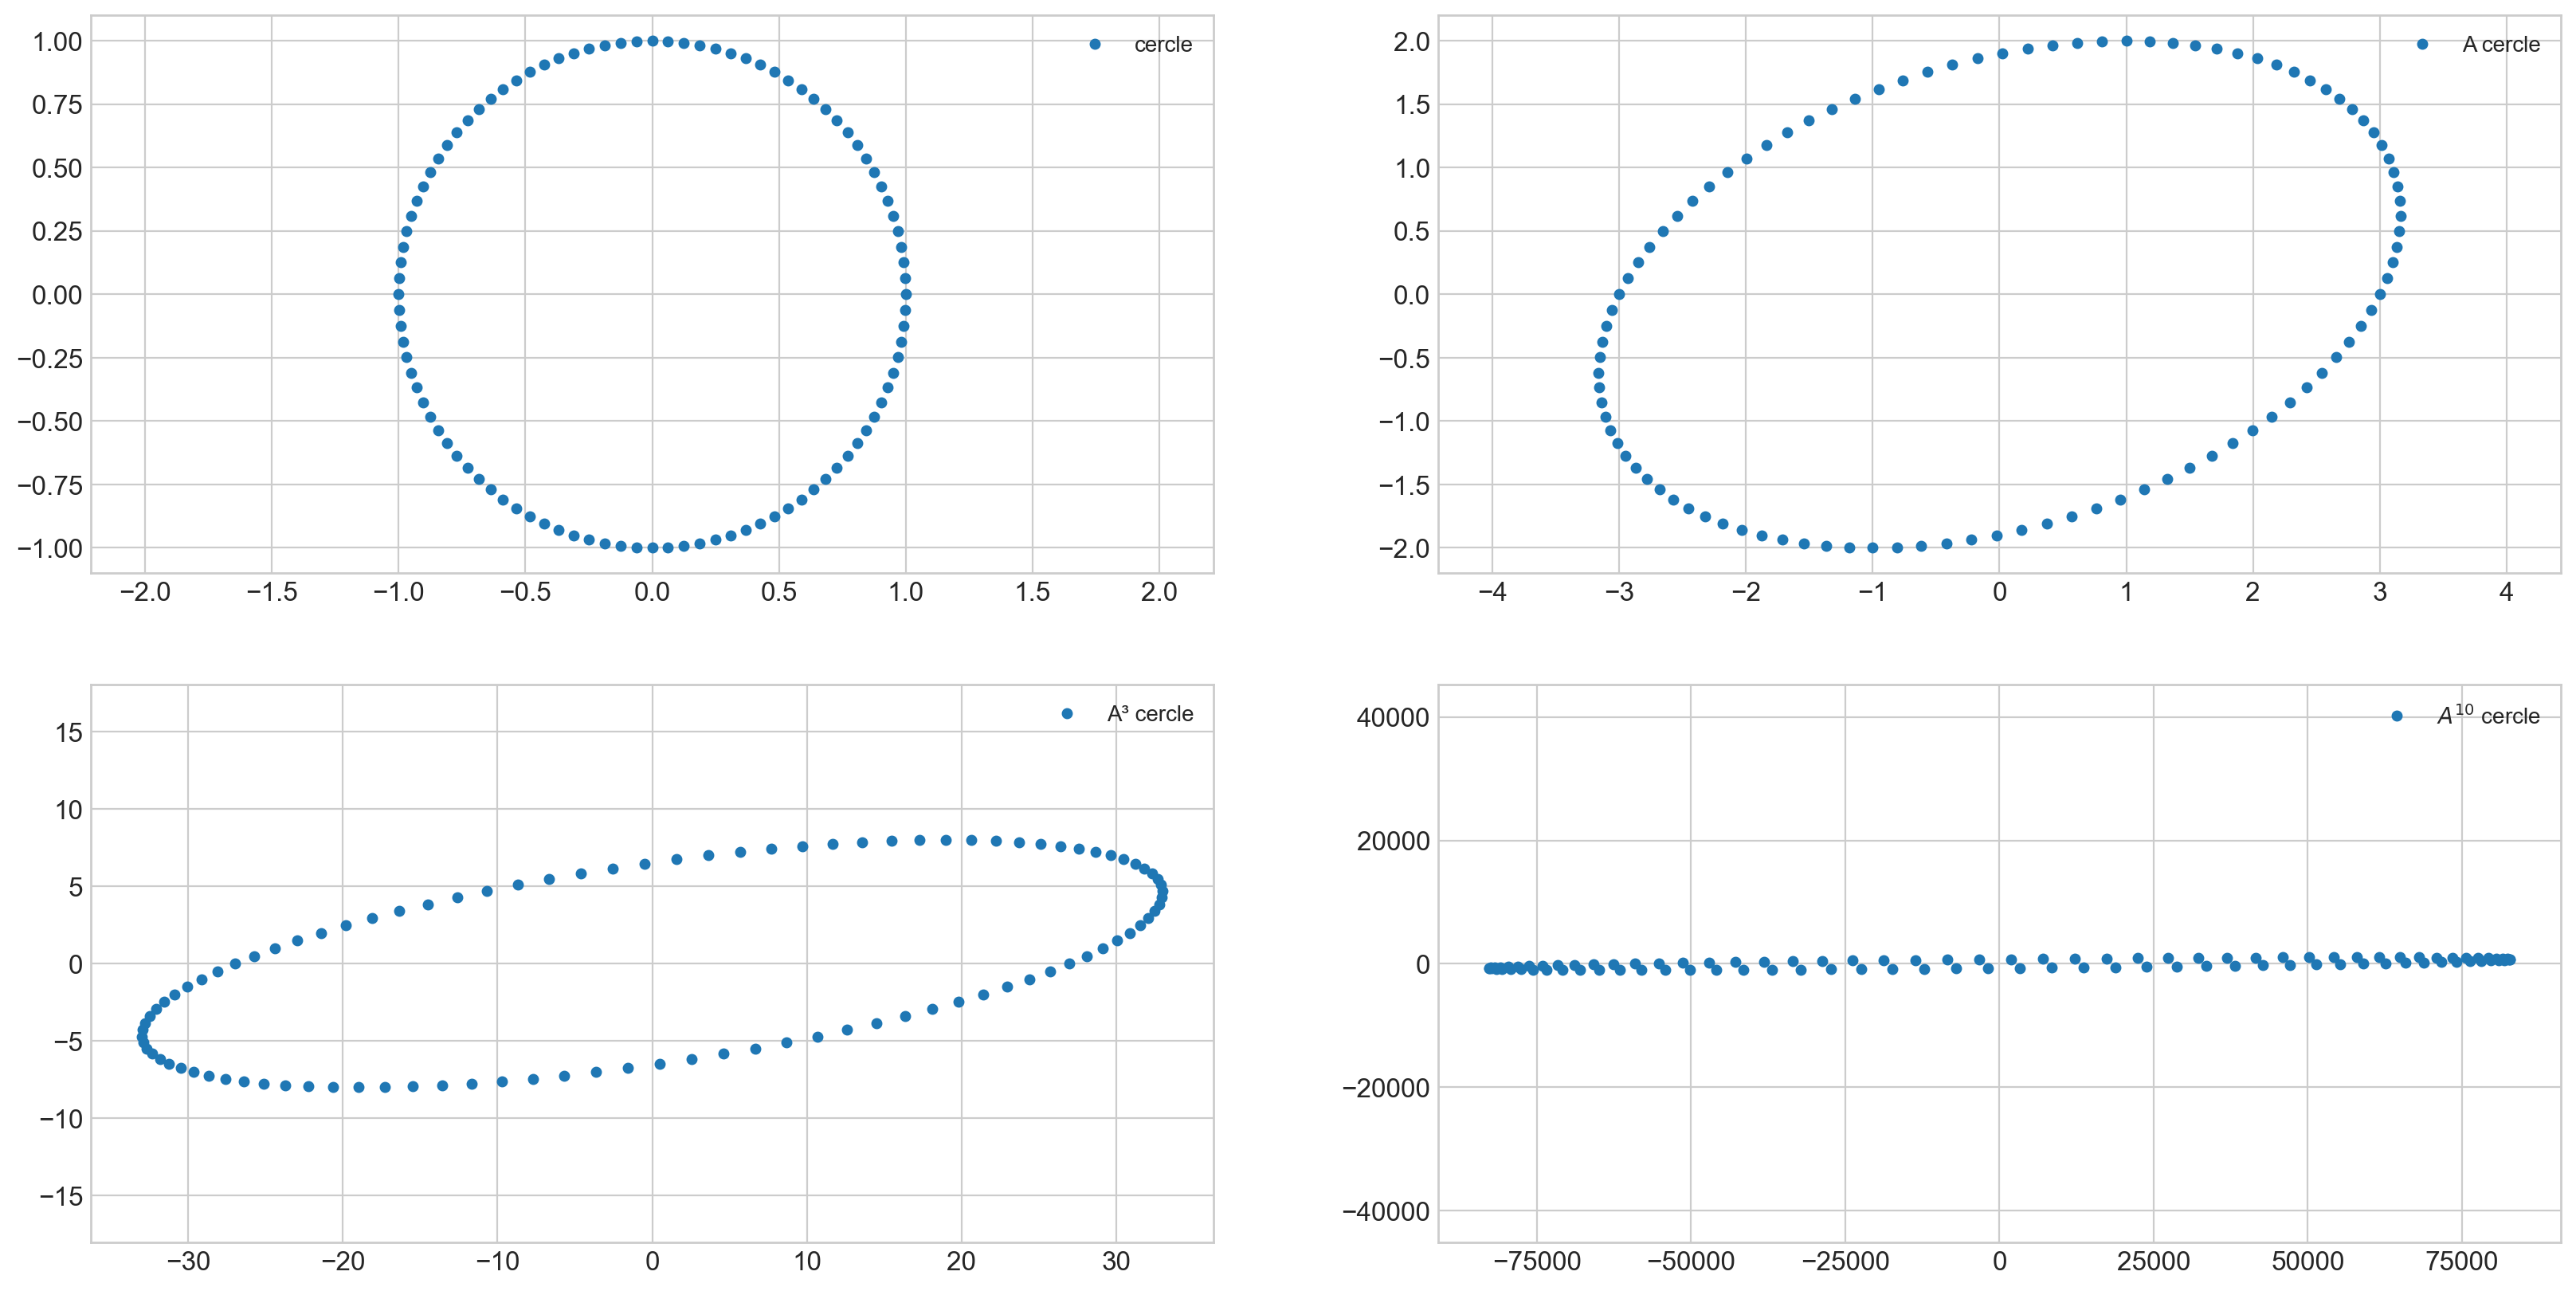

In [14]:
fig, ax = plt.subplots(2,2, figsize=(20,10))
ax[0,0].plot(cercle[0], cercle[1], '.', label='cercle' )
ax[0,1].plot((A @ cercle)[0], (A @ cercle)[1], '.', label='A cercle' )
ax[1,0].plot((A @ A @ A @ cercle)[0], (A @ A @ A @ cercle)[1], '.', label='A³ cercle' )
ax[1,1].plot(a10c[0], a10c[1], '.' , label=r'$A^{10}$ cercle')
for x in ax.flat:
    x.axis("equal")
    x.legend()

On voit que les points du cercle s'alignent dans l'axe du premier vecteur propre.

## Le cas des matrices de rotation

On sait bien que si on applique plusieurs fois une rotation tous les points ne vont pas s'aligner dans une direction.
On a donc un comportement totalement différent. Qu'en est-il des vecteurs propres d'une matrice de rotation ?

In [15]:
def Rot(θ):
    return np.array([[np.cos(θ), -np.sin(θ)], [np.sin(θ), np.cos(θ)]])

R = Rot(2*np.pi/10)

R_valp, R_vecp = lin.eig(R)
print("Valeurs propres de R :", R_valp,"\n")
print("Norme des valeurs propres de R :", lin.norm(R_valp[0]), " et ", lin.norm(R_valp[1]), "\n")
print("Vecteurs propres de R :\n", R_vecp)

Valeurs propres de R : [0.809+0.588j 0.809-0.588j] 

Norme des valeurs propres de R : 1.0  et  1.0 

Vecteurs propres de R :
 [[0.707+0.j    0.707-0.j   ]
 [0.   -0.707j 0.   +0.707j]]


In [16]:
# regardons un autre angle
R = Rot(np.pi/2)

R_valp, R_vecp = lin.eig(R)
print("Valeurs propres de R :", R_valp,"\n")
print("Vecteurs propres de R :\n", R_vecp)

Valeurs propres de R : [0.+1.j 0.-1.j] 

Vecteurs propres de R :
 [[0.707+0.j    0.707-0.j   ]
 [0.   -0.707j 0.   +0.707j]]


On constate que
    
* les valeurs propres et vecteurs propres sont des complexes
* les valeurs propres sont de norme 1 (normal puisque c'est une isométrie)
* l'angle de rotation θ se retrouve dans les valeurs propres  $ v_p = e^{\pm \,i\, θ}$

C'est le second point qui fait qu'aucun des vecteurs propre ne peut prendre l'ascendant et qu'on ne retrouve pas
l'alignement des points de notre figure le long du premier vecteur propre.

In [17]:
θ = np.pi / 10
R = Rot(θ)
R_valp, R_vecp = lin.eig(R)
np.e**(0+1j * θ), R_valp[0], R_valp[1]

((0.9510565162951535+0.3090169943749474j),
 (0.9510565162951535+0.3090169943749474j),
 (0.9510565162951535-0.3090169943749474j))

### Symétrie axiale horizontale

Sx = 
$
\begin{bmatrix}
1 & 0 \\
0 & -1  \\
\end{bmatrix}
$

Là c'est simple puisque la matrice est diagonale, donc ses valeurs propres sont les valeurs de la diagonales.
Elles ont la même norme donc pas d'alignement des points dans la direction du premier vecteur propre.

In [18]:
Sx = np.array([[1, 0], [0, -1]])

Sx_valp, Sx_vecp = lin.eig(Sx)
print("Valeurs propres de Sx :", Sx_valp,"\n")
print("Vecteurs propres de Sx :\n", Sx_vecp)

Valeurs propres de Sx : [ 1. -1.] 

Vecteurs propres de Sx :
 [[1. 0.]
 [0. 1.]]


Une matrice diagonale ne modifie que la i-ème coordonnée de **x** par la i-ème valeur de sa diagonale. Aussi ses vecteurs propres sont ceux de la base d'origine.

In [19]:
D = np.diag(np.random.randint(10,size=5))
D

array([[5, 0, 0, 0, 0],
       [0, 9, 0, 0, 0],
       [0, 0, 5, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 2]])

In [20]:
D_valp, D_vecp = lin.eig(D)
print("Valeurs propres de D :", D_valp,"\n")
print("Vecteurs propres de D :\n", D_vecp)

Valeurs propres de D : [5. 9. 5. 3. 2.] 

Vecteurs propres de D :
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


## Diagonalisation d'une matrice

On voit l'importance des valeurs et vecteurs propres pour caractériser une application linéaire. En fait ils sont tellement
important qu'en appliquant le bon changement de repère, l'application est représentée par une matrice diagonale
contenant les valeurs propres. 

$$
\exists P \; / \; A = P\, \Lambda \, P^{-1} \quad \textrm{avec } \Lambda \textrm{ la matrice diagonale des valeurs propres } \lambda_i
$$

La matrice de passage $P$ représente la nouvelle base donc sans surprise il s'agit des vecteurs propres. 

Vérifions le avec A :

In [21]:
print('A :\n', A, '\n')
print('𝑃 Λ inv(𝑃) :\n', vec_propre @ np.diag(val_propre) @ lin.inv(vec_propre))

A :
 [[3 1]
 [0 2]] 

𝑃 Λ inv(𝑃) :
 [[3. 1.]
 [0. 2.]]


Ainsi la formule pour obtenir la diagonalisation de A est $\; \Lambda  = P^{-1} \, A \, P\;$  lorsqu'on connait ses
vecteurs propres (en pratique si on a les vecteurs propres on a aussi les valeurs propres et donc la diagonalisation de A).

In [22]:
print('P :\n', vec_propre, '\n')
print('inv(𝑃) A 𝑃 :\n', lin.inv(vec_propre) @ A @ vec_propre)

P :
 [[ 1.    -0.707]
 [ 0.     0.707]] 

inv(𝑃) A 𝑃 :
 [[3. 0.]
 [0. 2.]]


On retrouve nos 2 valeurs propres sur la diagonale.

**Matrice inversible** Notons que si une des valeurs propres est nulle alors $\Lambda$ n'est pas inversible et comme il s'agit de
la même application que A (dans un autre repère) alors A n'est pas inversible non plus.

**Matrice non diagonalisable** Si l'ensemble des vecteurs propres ne génère pas un espace de la même dimension que d'origine (c.a.d. que 2 vecteurs propres sont colinéaires), alors on ne peut pas diagonaliser la matrice.

**Matrice symétrique de réels** Dans ce cas il existe une matrice de passage orthogonale et la matrice diagonale des valeurs propres a toutes ses valeurs réelles.

**Matrice symmétrique réelle définie positive** (c.a.d. $\forall {\bf x} \in ℝ^n, \; {\bf x}^T\, A \, {\bf x} > 0$) a toutes ses valeurs propres strictement positives.